### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

###  Sample Data

In [2]:
data = pd.DataFrame({
    "temperature": [20, 25, 22, 30, 28, 18, 24, 26],
    "occupants": [2, 3, 2, 5, 4, 1, 3, 2],
    "appliances": [5, 8, 6, 10, 9, 4, 7, 6],
    "time_of_day": [9, 14, 10, 20, 18, 7, 13, 15]
})

# Simulated electricity consumption
data["consumption"] = (
    0.5 * data["temperature"] +
    2 * data["occupants"] +
    1.2 * data["appliances"] +
    0.3 * data["time_of_day"] +
    np.random.normal(0, 1, len(data))
)

print("Sample Data:\n", data)

Sample Data:
    temperature  occupants  appliances  time_of_day  consumption
0           20          2           5            9    21.475259
1           25          3           8           14    32.895368
2           22          2           6           10    24.452685
3           30          5          10           20    43.737584
4           28          4           9           18    37.590632
5           18          1           4            7    18.143093
6           24          3           7           13    28.517242
7           26          2           6           15    26.902450


### Split Data

In [3]:
X = data[["temperature", "occupants", "appliances", "time_of_day"]]
y = data["consumption"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Scale Features

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Apply Multiple Regression Models

In [5]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Evaluate Models

In [7]:
def evaluate_model(y_test, y_pred):
    return {
        "R²": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

models = {
    "Linear Regression": y_pred_lr,
    "Polynomial Regression": y_pred_poly,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf
}

results = pd.DataFrame({name: evaluate_model(y_test, pred) for name, pred in models.items()}).T
print("\nModel Performance:\n", results)


Model Performance:
                              R²        MSE       MAE
Linear Regression      0.905653   5.133158  2.172784
Polynomial Regression  0.958032   2.283343  1.210175
Ridge Regression       0.957686   2.302214  1.515798
Lasso Regression       0.996301   0.201271  0.371753
Decision Tree          0.721809  15.135658  3.855146
Random Forest          0.628645  20.204447  4.494618


### Visualize Best Model


Best Model: Lasso Regression


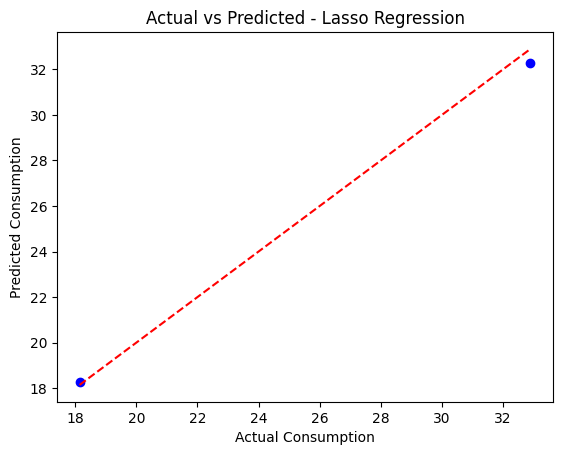

In [8]:
best_model_name = results["R²"].idxmax()
print("\nBest Model:", best_model_name)

best_pred = models[best_model_name]

plt.scatter(y_test, best_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.show()